In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential






In [3]:
train_dir = "/archive/split_dataset_plantVillage/train"
test_dir = "/archive/split_dataset_plantVillage/test"
val_dir = "/archive/split_dataset_plantVillage/val"


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                
                                   fill_mode='nearest')


valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


batch_size = 32
training_set = train_datagen.flow_from_directory(train_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            )

valid_set = valid_datagen.flow_from_directory(val_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            )



test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            )

Found 16505 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.
Found 2075 images belonging to 15 classes.


In [5]:
class_dict = training_set.class_indices
class_dict

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [6]:
train_num = training_set.samples
valid_num = valid_set.samples
test_num = test_set.samples

In [7]:
from PIL import Image
import numpy as np

In [8]:
img = Image.open("/archive/split_dataset_plantVillage/train/Tomato_Leaf_Mold/0ed11606-167f-4951-9a07-ffaa7e2aa88a___Crnl_L.Mold 6831.JPG")

In [9]:
img_array = np.array(img)

In [10]:
img_array

array([[[162, 150, 150],
        [134, 122, 122],
        [172, 160, 160],
        ...,
        [108,  92,  92],
        [143, 127, 127],
        [139, 123, 123]],

       [[180, 168, 168],
        [152, 140, 140],
        [143, 131, 131],
        ...,
        [122, 106, 106],
        [128, 112, 112],
        [132, 116, 116]],

       [[150, 138, 138],
        [156, 144, 144],
        [158, 146, 146],
        ...,
        [143, 127, 127],
        [126, 110, 110],
        [135, 119, 119]],

       ...,

       [[169, 159, 160],
        [182, 172, 173],
        [168, 158, 159],
        ...,
        [184, 172, 172],
        [169, 157, 157],
        [159, 147, 147]],

       [[168, 158, 159],
        [175, 165, 166],
        [178, 168, 169],
        ...,
        [173, 161, 161],
        [153, 141, 141],
        [145, 133, 133]],

       [[165, 155, 156],
        [162, 152, 153],
        [195, 185, 186],
        ...,
        [168, 156, 156],
        [145, 133, 133],
        [142, 130, 130]]

In [11]:
class_names = class_dict.keys()
class_names

dict_keys(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'])

In [12]:
base_model = VGG16(input_shape=(224,224, 3), weights='imagenet', include_top=False)

# check structure and layer names before looping


In [13]:
from keras.layers import Dropout, Flatten, Dense

In [14]:

base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(15, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 16,321,359
Trainable params: 16,321,359
Non-trainable params: 0
_________________________________________________________________


In [17]:
base_model.trainable = False

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 16,321,359
Trainable params: 1,606,671
Non-trainable params: 14,714,688
_________________________________________________________________


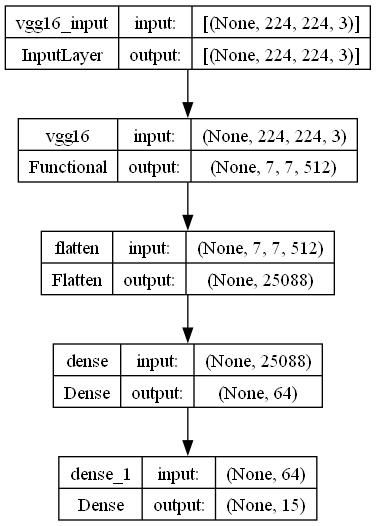

In [19]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
from keras.callbacks import EarlyStopping



In [22]:
early_stop = EarlyStopping(monitor='accuracy',
                           patience=1,
                           restore_best_weights=False,
                           mode='auto')

In [23]:
n_steps = len(training_set)

n_steps

516

In [24]:
n_val_steps = len(test_set)
n_val_steps

65

In [25]:
history = model.fit(training_set,
                         steps_per_epoch=n_steps,
                         validation_data=valid_set,
                         epochs=7,
                         validation_steps=n_val_steps,
                         callbacks= early_stop
                         )

Epoch 1/7
516/516 [==============================] - 2844s 6s/step - loss: 1.3506 - accuracy: 0.5769 - val_loss: 0.7031 - val_accuracy: 0.7765
Epoch 2/7
516/516 [==============================] - 2927s 6s/step - loss: 0.7441 - accuracy: 0.7536 - val_loss: 0.5467 - val_accuracy: 0.8139
Epoch 3/7
516/516 [==============================] - 2691s 5s/step - loss: 0.6074 - accuracy: 0.7958 - val_loss: 0.6209 - val_accuracy: 0.7804
Epoch 4/7
516/516 [==============================] - 2732s 5s/step - loss: 0.5514 - accuracy: 0.8087 - val_loss: 0.4638 - val_accuracy: 0.8392
Epoch 5/7
516/516 [==============================] - 2827s 5s/step - loss: 0.5041 - accuracy: 0.8301 - val_loss: 0.5236 - val_accuracy: 0.8115
Epoch 6/7
516/516 [==============================] - 2855s 6s/step - loss: 0.4742 - accuracy: 0.8376 - val_loss: 0.3999 - val_accuracy: 0.8625
Epoch 7/7
516/516 [==============================] - 3296s 6s/step - loss: 0.4471 - accuracy: 0.8482 - val_loss: 0.3953 - val_accuracy: 0.8630

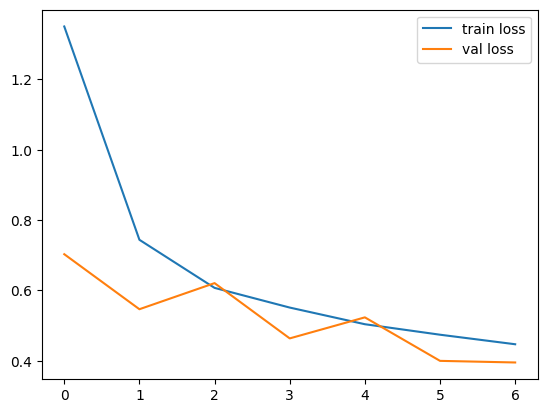

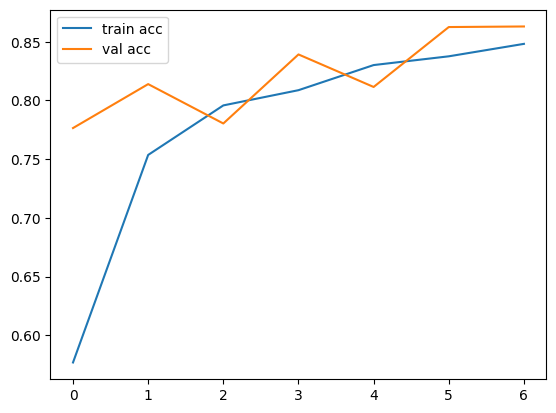

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [27]:
np.mean(history.history['accuracy'])

0.7786817806107658

In [28]:
np.mean(history.history['val_accuracy'])

0.8209773812975202

In [29]:
model.save('vgg16_finetune_model.h5')

In [32]:
y_pred = model.predict(valid_set)

65/65 [==============================] - 326s 5s/step


In [33]:
y_pred

array([[4.41860827e-03, 4.79599014e-02, 1.51665742e-03, ...,
        3.62612482e-08, 1.12194636e-08, 1.07017172e-06],
       [1.24142169e-10, 1.08968243e-06, 1.88959084e-10, ...,
        1.14411336e-07, 1.29944542e-02, 1.45051570e-03],
       [1.60110911e-04, 8.15671967e-07, 1.30801648e-03, ...,
        1.37352231e-07, 1.97379730e-08, 1.75848420e-08],
       ...,
       [2.49502789e-02, 9.74948525e-01, 2.97474344e-07, ...,
        8.18490425e-16, 5.99044001e-17, 3.41107032e-09],
       [3.23420457e-10, 8.13368123e-12, 3.66029695e-08, ...,
        6.16102043e-05, 3.56626913e-07, 6.23015239e-08],
       [9.34368671e-09, 1.08619158e-09, 3.99381315e-05, ...,
        2.18983833e-03, 2.42610704e-02, 9.15878713e-02]], dtype=float32)

In [64]:
y_values = np.argmax(y_pred, axis=1)
y_values

array([ 7, 10,  9, ...,  1,  5,  7], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [73]:
class_list = list(class_dict.keys())
class_list

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [75]:
true_classes = valid_set.classes

In [68]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

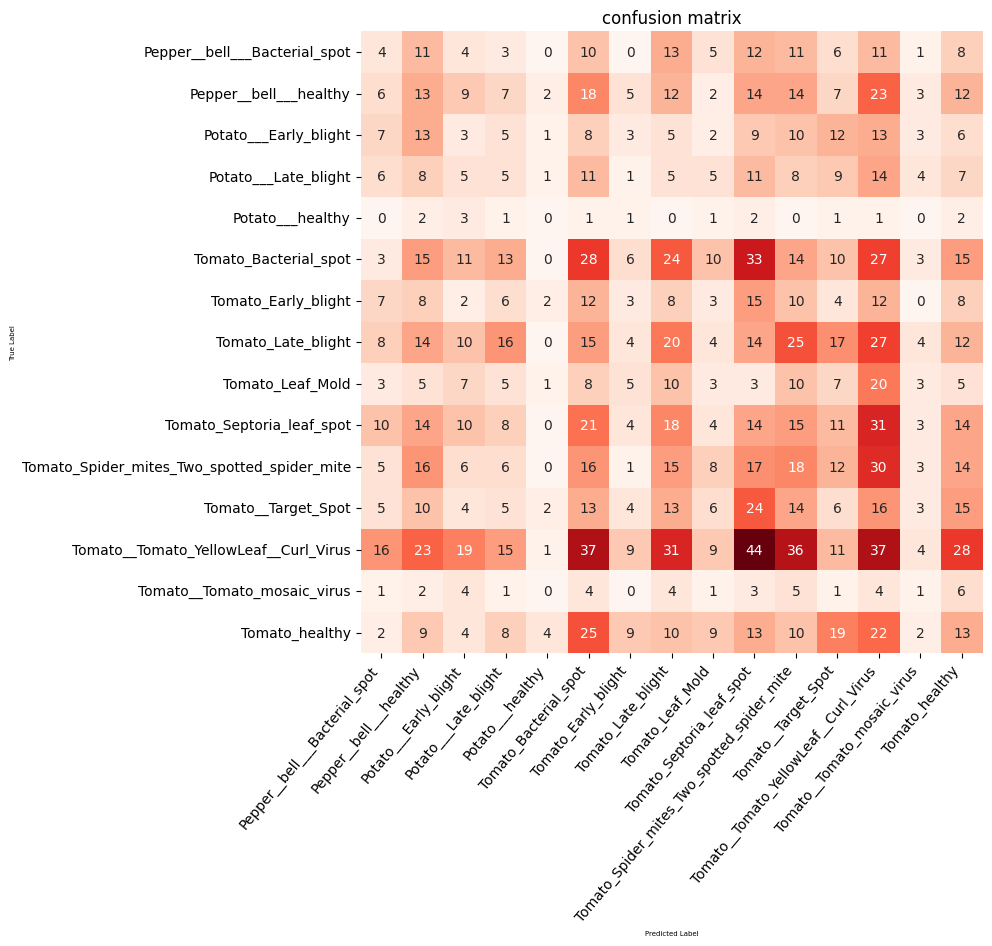

In [89]:
def plot_heatmap(y_true, y_pred, class_list,ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_list, 
        yticklabels=class_list,
        fmt='d', 
        cmap=plt.cm.Reds,
        cbar=False,
        ax=ax
    )


    ax.set_title(title, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
    ax.set_ylabel('True Label', fontsize=5)
    ax.set_xlabel('Predicted Label', fontsize=5)

fig, ax1= plt.subplots(1,1, figsize=(10,10))



plot_heatmap(true_classes, y_values, class_list,ax1, title="confusion matrix")



fig.tight_layout()
plt.show()